# Pandas
## Primeros pasos

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Core components: `Series` y `DataFrame`
`Pandas` tiene dos objetos principales: `Series` y `DataFrame`.

Una `Series` es esencialmente una columna, y un `DataFrame` es una tabla compuesta de una colección de `Series`.

![](img/pandas_1.png)


## Crear un DataFrame desde cero
Hay más de una forma de crear un `DataFrame`, pero una opción rápida y sencilla es utilizando un diccionario para alimentar los datos.

Supongamos que somos dueños de un puesto de frutas. Queremos tener una columna para cada fruta y una fila para cada venta que le hacemos a un cliente.

In [2]:
data = {
    'manzanas' : [3,2,0,1],
    'naranjas' : [0,3,1,2],
    'kiwis' : [1,1,5,2]
}

Este diccionario lo vamos a usar para crear nuestro DataFrame. El método que crea el DataFrame a partir de un diccionario sabe que deberá tomar las **llaves** del diccionario como **columnas** y las **listas de valores** como las **filas**.

In [3]:
df = pd.DataFrame(data)
df

,manzanas,naranjas,kiwis
0,3,0,1
1,2,3,1
2,0,1,5
3,1,2,2


In [8]:
manzanas = df['manzanas']
manzanas

0    3
1    2
2    0
3    1
Name: manzanas, dtype: int64

In [9]:
df.naranjas

0    0
1    3
2    1
3    2
Name: naranjas, dtype: int64

In [10]:
list(df.naranjas)

[0, 3, 1, 2]

---

# Análisis exporatorio

## Lectura de bases de datos
Sin duda, la manera que más común de crear DataFrames en Pandas es leyendo una base de datos de un archivo externo.

### Base de Datos de películas
Descargué una base de datos de películas de IMDb de Kaggle. [Ésta es la liga](https://www.kaggle.com/PromptCloudHQ/imdb-data) a la base de datos.


### Descripción

Here's a data set of 1,000 most popular movies on IMDB in the last 10 years. The data points included are:

Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore

Feel free to tinker with it and derive interesting insights.

---

Comencemos leyendo la base de datos con `read_csv()`

In [29]:
df = pd.read_csv('data/imdb.csv')

Leimos el archivo sin ningún problema. Ahora lo primero que nos gustaría hacer es ver las  primeras filas de nuestra tabla. Pandas nos permite inspeccionar las  primeras 5 filas utlizando el método `head()`.

**Nota: se utiliza el nombre de variable `df` para abreviar `DataFrame`** 

In [15]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Si quisieramos ver más filas, podemos pasar un número entero al método `head()` y nos mostrará el número de filas que especifiquemos. Mostremos las primeras diez filas usando `df.head(10)`

In [30]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


Quiero saber el nombre de cada una de las columnas

In [31]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Es más fácil trabajar con nombres de columnas que no tengan espacios, por lo siguiente

In [36]:
df.Rank.head()

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

Cuando no tiene espacio, podemos usar la notación `dataframe.columna`, pero si tiene espacio, tenemos que poner los valores entre comillas y corchetes.

In [33]:
df.Revenue (Millions)

AttributeError: 'DataFrame' object has no attribute 'Revenue'

In [34]:
df.`Revenue (Millions)`

SyntaxError: invalid syntax (<ipython-input-34-b8b4ea661e80>, line 1)

In [37]:
df['Revenue (Millions)'].head()

0    333.13
1    126.46
2    138.12
3    270.32
4    325.02
Name: Revenue (Millions), dtype: float64

Para evitarnos problemas, lo que podemos hacer es renombrar las columnas

In [39]:
df = df.rename(columns = {'Revenue (Millions)':'Revenue_Millions'})
df = df.rename(columns = {'Runtime (Minutes)':'Runtime_Minutes'})
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

In [40]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Aunque ver las primeras filas ya nos dice bastante acerca del conjunto de datos, es necesario poder obtener un resumen más amplio.

Para esto, podemos utilizar dos métodos:

- `DataFrame.info()`: Imprime un resumen conciso del dataframe incluyendo tipo de dato del índice, tipo de dato de cada columna, si hay o no valores nulos, tamaño en memoria del dataframe.
- `DataFrame.describe()`: Genera estadisticos básicos (descriptivos) del dataframe


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                1000 non-null int64
Title               1000 non-null object
Genre               1000 non-null object
Description         1000 non-null object
Director            1000 non-null object
Actors              1000 non-null object
Year                1000 non-null int64
Runtime_Minutes     1000 non-null int64
Rating              1000 non-null float64
Votes               1000 non-null int64
Revenue_Millions    872 non-null float64
Metascore           936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


Este output nos informa lo siguiente:
- Tnemos un dataframe que tiene 1000 renglones con 12 columnas
- La variable **Rank** cuenta con 1000 valores enteros no nulos
- La variable **Title** cuenta con 1000 valores objeto no nulos
- La variable **Genre** cuenta con 1000 valores objeto no nulos
- $\vdots$
- La variable **Votes** cuenta con 1000 valores flotantes no nulos

Sin embargo, vemos que el número de **Revenue_Millions** y **Metascore** no es 1000


Si ejecutamos `DataFrame.Series.isna()`, nos va a regresar un `DataFrame` que contenga `True` si el valor en esa posición es `na` y `False` si no lo es. Por lo tanto, para probar si existe **por lo menos** un valor `na` podemos concatenar el método `any()` a `DataFrame.Series.isna()`. O sea  `DataFrame.Series.isna().any()`

Veamos esto paso por paso:

1.  `DataFrame.Series.isna()`

In [56]:
df.Revenue_Millions.isna()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22      True
23     False
24     False
25      True
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976     True
977     True
978     True
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988     True
989    False
990    False
991    False
992    False
993    False
994    False
995     True
996    False
997    False
998     True
999    False
Name: Revenue_Millions, Length: 1000, dtype: bool

Como podemos ver, hay varios valores en `True`. El problema con esto es que no podemos ver los 1000 valores al mismo tiempo porque pandas se salta la mayoría de las observaciones para no imprimir un output demasiado grande. En este caso, Pandas nos mostró las observaciones 0 a 29 y 970 a 999. Entonces tenemos muchos valores en medio que no estamos viendo. Es mejor entonces comprobar si existen o no `na` utilizando  `DataFrame.Series.isna().any()`

In [58]:
df.Revenue_Millions.isna().any()

True

Hagamos lo mismo para `Metascore`

In [59]:
df.Metascore.isna().any()

True

Ok, entonces tenemos valores `na` tanto en `Metascore` como en `Revenue_Millions`. ¿Pero cuántos?

In [62]:
print("Número total de NA en Metascore:", df.Metascore.isna().sum())
print("Número total de NA en Revenue Millions:", df.Revenue_Millions.isna().sum())

Número total de NA en Metascore: 64
Número total de NA en Revenue Millions: 128


Es un gran inconveniente tener valores NA ya que éstos pueden estropear cálculos, visualizaciones, etc... Quitémoslos.

Dato que tener valores NA es un escenario bastante común y bastante indeseable, pandas facilita la eliminación de estos valores con el método `dropna()`

In [64]:
df = df.dropna()

Veamos info nuevamente

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
Rank                838 non-null int64
Title               838 non-null object
Genre               838 non-null object
Description         838 non-null object
Director            838 non-null object
Actors              838 non-null object
Year                838 non-null int64
Runtime_Minutes     838 non-null int64
Rating              838 non-null float64
Votes               838 non-null int64
Revenue_Millions    838 non-null float64
Metascore           838 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


Ya no tenemos ningún valor en nulo

In [66]:
df.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


(array([  6.,  18.,  73.,  98., 140., 158., 150., 125.,  53.,  17.]),
 array([ 11. ,  19.9,  28.8,  37.7,  46.6,  55.5,  64.4,  73.3,  82.2,
         91.1, 100. ]),
 <a list of 10 Patch objects>)

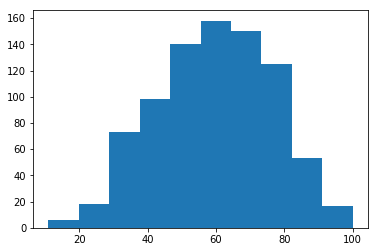

In [91]:
plt.hist(df.Metascore,10)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                1000 non-null int64
Title               1000 non-null object
Genre               1000 non-null object
Description         1000 non-null object
Director            1000 non-null object
Actors              1000 non-null object
Year                1000 non-null int64
Runtime_Minutes     1000 non-null int64
Rating              1000 non-null float64
Votes               1000 non-null int64
Revenue_Millions    872 non-null float64
Metascore           936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [22]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [24]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [28]:
df2 = pd.read_csv('data/imdb.csv')

ParserError: Error tokenizing data. C error: Expected 44 fields in line 66, saw 46


In [27]:
df2.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
